In [1]:
# standard imports
import numpy as np
import sklearn as sk

%matplotlib inline
import matplotlib as mb
import matplotlib.pyplot as plt

## Linear Regression

#### Normal Equation

In [2]:
np.random.seed(42)

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Text(0.5, 1.0, 'Randomly generated linear dataset')

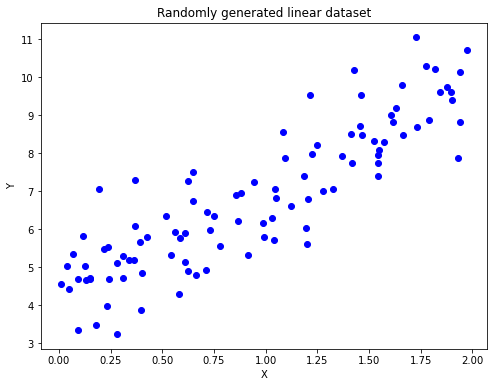

In [3]:
plt.figure(figsize=(8,6))
plt.scatter(X, y, c="b")
plt.ylabel("Y")
plt.xlabel("X")
plt.title("Randomly generated linear dataset")

In [4]:
# solve linear regression with normal equation
X_b = np.c_[np.ones((100,1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(f"Theta_best = {theta_best}")

Theta_best = [[4.21509616]
 [2.77011339]]


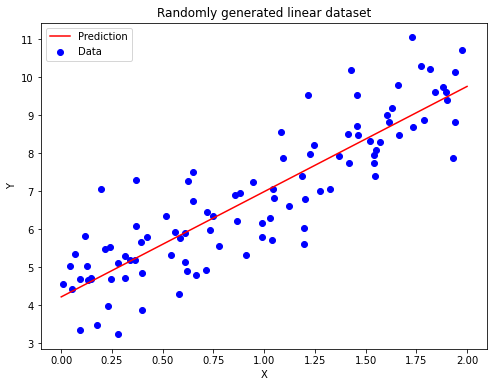

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones(X_new.shape), X_new]
y_predict = X_new_b.dot(theta_best)

plt.figure(figsize=(8,6))
plt.plot(X_new, y_predict, "r-", label="Prediction")
plt.scatter(X, y, c="b", label="Data")
plt.ylabel("Y")
plt.xlabel("X")
plt.title("Randomly generated linear dataset")
plt.legend()
plt.show()

#### Linear Regression (Psuedo-inverse)

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(f"Intercept = {lin_reg.intercept_}, Coeff = {lin_reg.coef_}")

Intercept = [4.21509616], Coeff = [[2.77011339]]


The `LinearRegression` class is based on the Moore-Penrose psuedoinverse. This is done via Singular Value Decomposition.

### Batch Gradient Descent

Evaluates the gradient of the cost using the *FULL* training dataset.

In [7]:
eta = 0.1 # learning rate
n_iters = 1000
m = 100 # num training samples

theta = np.random.randn(2,1)
thetas_batch = np.zeros((n_iters, 2))

for i in range(n_iters):
    thetas_batch[i] = theta.squeeze()
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) # grad for MSE
    theta = theta - eta * gradients # gradient descent

print(f"theta for batch GD = {theta}")

theta for batch GD = [[4.21509616]
 [2.77011339]]


### Stochastic Gradient Descent with LR Scheduling

Evaluate the gradient using a random instance of the training dataset.

In [8]:
n_epochs = 50
t0, t1 = 5, 50

theta = np.random.rand(2,1)
thetas_stochastic = np.zeros((n_epochs*m,2))

def LR_schedule(t):
    return t0/(t + t1)

for e in range(n_epochs):
    # shuffle so gradient evaluated across all samples
    shuffle_idx = np.random.permutation(m)
    X_b_shuffled = X_b[shuffle_idx]
    y_shuffled = y[shuffle_idx]
    for i in range(m):
        thetas_stochastic[i] = theta.squeeze()
        random_idx = np.random.randint(m)
        xi = X_b_shuffled[random_idx, None]
        yi = y_shuffled[random_idx]
        gradient = 2 * xi.T.dot(xi.dot(theta) - yi)
        theta = theta - LR_schedule(e*m + i) * gradient
        
print(f"theta for batch GD = {theta}")

theta for batch GD = [[4.24467668]
 [2.73828798]]


### Mini-batch Gradient Descent

Compute gradient across random sets of training data. More stable than SGD but still not as stable as Batch GD. Allows for GPU hardware acceleration.

In [9]:
t0, t1 = 200, 1000
def LR_schedule(t):
    return t0/(t + t1)

n_iters = 50
theta = np.random.rand(2,1)
theta_minibatch = np.zeros((n_iters, 2))

batch_size = 20

for e in range(n_iters):
    theta_minibatch[e] = theta.squeeze()
    # shuffle so all instances more likely to be evaluated for gradient
    shuffle_idx = np.random.permutation(m)
    X_b_shuffled = X_b[shuffle_idx]
    y_shuffled = y[shuffle_idx]
    for i in range(0, m, batch_size):
        random_idx = np.random.randint(m - batch_size)
        x_batch = X_b_shuffled[random_idx: random_idx + batch_size]
        y_batch = y_shuffled[random_idx: random_idx + batch_size]

        gradient = 2/batch_size * (x_batch.T.dot((x_batch.dot(theta)) - y_batch))
        theta = theta - LR_schedule(e) * gradient
        
print(f"theta for batch GD = {theta}")

theta for batch GD = [[4.27408505]
 [2.78788926]]


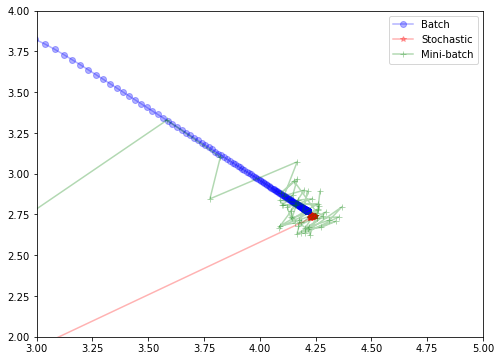

In [10]:
# plot comparison of the three
plt.figure(figsize=(8,6))
plt.plot(thetas_batch[:,0], thetas_batch[:,1], "bo-", label="Batch", alpha=0.3)
plt.plot(thetas_stochastic[:,0], thetas_stochastic[:,1], "r*-", label="Stochastic", alpha=0.3)
plt.plot(theta_minibatch[:,0], theta_minibatch[:,1], "g+-", label="Mini-batch", alpha=0.3)
plt.ylim([2, 4])
plt.xlim([3, 5])
plt.legend()
plt.show()

Can clearly see that batch GD is more stable than the other two (but it takes much longer to run). Mini-batch should be more stable than SGD but not sure why it doesn't seem to be the case here...look into later.

### Polynomial Regression

Text(0.5, 1.0, 'Generated 2nd order data with noise')

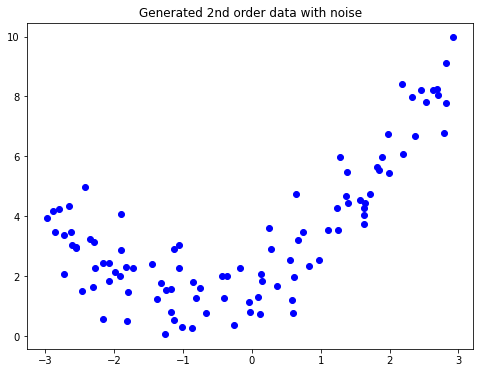

In [11]:
np.random.seed(42)

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

plt.figure(figsize=(8,6))
plt.scatter(X, y, c="b")
plt.title("Generated 2nd order data with noise")

In [12]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X) # include original feature X and the square of it
print(f"X[0] = {X[0]}")
print(f"X_poly[0] = {X_poly[0]}") 

X[0] = [-0.75275929]
X_poly[0] = [-0.75275929  0.56664654]


In [13]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

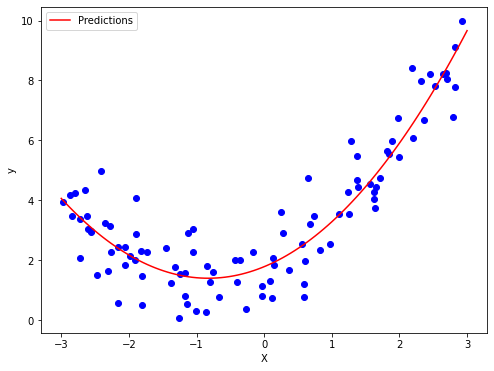

In [14]:
# plot the predictions
x_lin = np.linspace(-3, 3, 100).reshape(100,1)
poly_x = poly_features.transform(x_lin)
y_pred = lin_reg.predict(poly_x)
plt.figure(figsize=(8,6))
plt.scatter(X, y, color="b")
plt.plot(x_lin, y_pred, "r", label="Predictions")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## Learning Curves

Plots of the model's performance on the training set and the validation set as a funciton of the training set size. Used to determine if model is too complex or not complex enough.

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_pred = model.predict(X_train[:m])
        y_val_pred = model.predict(X_val[:m])
        train_errors.append(mean_squared_error(y_train[:m], y_train_pred))
        val_errors.append(mean_squared_error(y_val[:m], y_val_pred))
    
    plt.figure(figsize=(8,6))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=2, label="val")
    plt.legend()

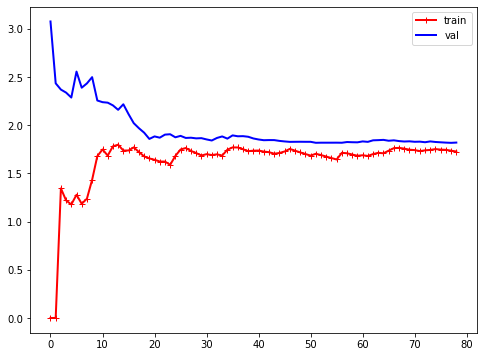

In [16]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

Can see that model has high validation error and not too good training error, which means that the model is too simple and is underfitting the data.

(0.0, 80.0, 0.0, 3.0)

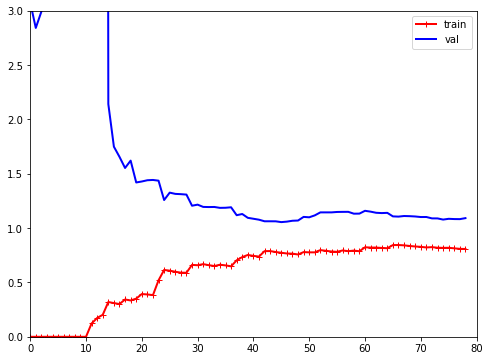

In [17]:
# show for overfitting model
from sklearn.pipeline import Pipeline

poly_reg = Pipeline([
    ("poly_feat", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

plot_learning_curves(poly_reg, X, y)
plt.axis([0, 80, 0, 3]) 

Can see that the validation error is lower as well as the training error than a pure Linear Regression. However, a model performing much better on training data than the validation data is a hallmark of *overfitting*.

## Regularized Linear Models

**NOTE**: make sure to scale features before performing fitting for most regularized models! (when some dimension features >>> other dim features)

In [18]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

### Ridge Regression

In [19]:
from sklearn.linear_model import Ridge

# Ridge Regression with closed-form solution
# cholesky decomp is numerically stable
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
closed_pred = ridge_reg.predict(X_new)

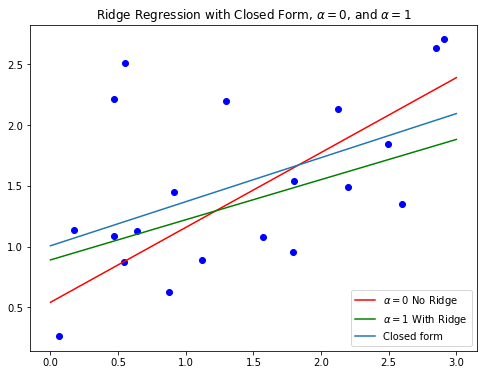

In [25]:
from sklearn.linear_model import SGDRegressor

sgd_no_ridge = SGDRegressor(penalty=None)
sgd_reg = SGDRegressor(alpha=1, penalty="l2") # using SGD with L2 penalty term 
                                     # (cost = MSE + alpha * 1/2 * (params)^2

sgd_no_ridge.fit(X, y.ravel())
sgd_reg.fit(X, y.ravel())

no_ridge_pred = sgd_no_ridge.predict(X_new)
ridge_pred = sgd_reg.predict(X_new)

# plot the differences
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color="b")
plt.plot(X_new, no_ridge_pred, "r-", label=r"$\alpha = 0$ No Ridge")
plt.plot(X_new, ridge_pred, "g-", label=r"$\alpha = 1$ With Ridge")
plt.plot(X_new, closed_pred, label="Closed form")
plt.legend()
plt.title(r"Ridge Regression with Closed Form, $\alpha = 0$, and $\alpha = 1$")
plt.show()

### Lasso Regression

Similar to Ridge Regression but instead uses $l_1$ norm for the weight vector. Important characteristic is that Lasso Regression will almost completely eliminate unimportant features (set them to 0).

The Lasso term is non-differentiable at 0, so need to use *subgradient vector* $g^{15}$ when any $\theta_i = 0$. See textbook for eqn.

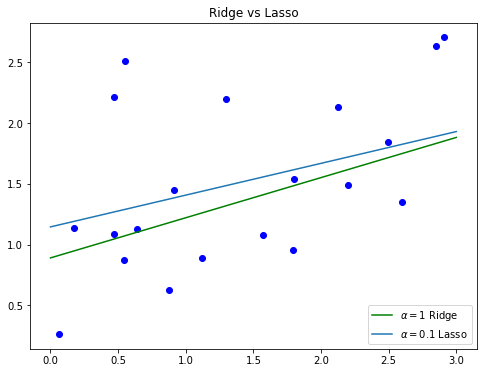

In [29]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_pred = lasso_reg.predict(X_new)

# plot the differences
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color="b")
plt.plot(X_new, ridge_pred, "g-", label=r"$\alpha = 1$ Ridge")
plt.plot(X_new, lasso_pred, label=r"$\alpha = 0.1$ Lasso")
plt.legend()
plt.title("Ridge vs Lasso")
plt.show()

### Elastic Net

Middle ground between Ridge Regression and Lasso Regression. It's just a mix of the two, and mix is controlled with a ratio param $r$.

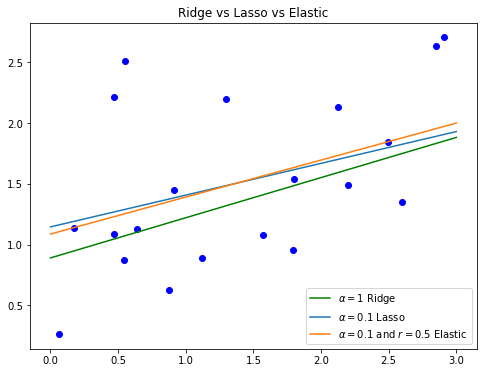

In [30]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5) # half l1 and l2
elastic_net.fit(X, y)

elastic_pred = elastic_net.predict(X_new)

# plot the differences
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color="b")
plt.plot(X_new, ridge_pred, "g-", label=r"$\alpha = 1$ Ridge")
plt.plot(X_new, lasso_pred, label=r"$\alpha = 0.1$ Lasso")
plt.plot(X_new, elastic_pred, label=r"$\alpha = 0.1$ and $r = 0.5$ Elastic")
plt.legend()
plt.title("Ridge vs Lasso vs Elastic")
plt.show()

### Early Stopping

In [31]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [41]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

poly_scaler = Pipeline([ 
    ("poly_feat", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

# warm_start will just continue fitting the regressor from where it left off
# the last time rather than from scratch
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        if epoch % 10 == 0:
            print(f"New min val_error = {val_error}!")
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

New min val_error = 14.534426235015886!
New min val_error = 10.548540882540538!
New min val_error = 8.042564291781627!
New min val_error = 6.689370857838776!
New min val_error = 5.573037740250274!
New min val_error = 3.9563248309141086!
New min val_error = 3.382073791157544!
New min val_error = 2.4020265557812537!
New min val_error = 1.6121998092613157!
New min val_error = 1.2957049647773367!


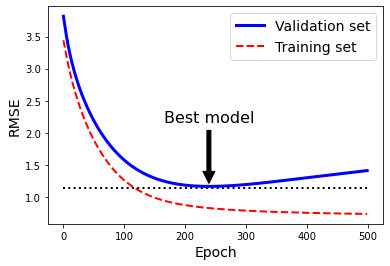

In [42]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

## Logistic Regression

Some regression algorithms can be used for classification as well. *Logistic Regression* or *Logit Regression* is commonly used to estimate the probability that an instance belongs to a particular class.

### Estimating Probabilities

The model will output a score (called a logit) and the logistic/softmax is applied on it to give a probability between 0 and 1. The cost is the log loss function.

### Decision Boundaries

To illustrate how a logistic regression works, use the iris dataset.

In [50]:
from sklearn import datasets

iris = datasets.load_iris()
print(list(iris.keys()))
print(iris["DESCR"])

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:   

In [51]:
X = iris["data"][:, 3:] # pedal width
y = (iris["target"] == 2).astype(int) # 1 if Iris-Virginica, else 0

In [47]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

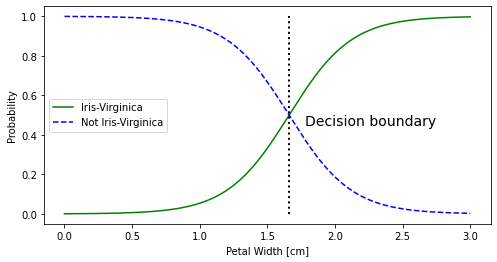

In [74]:
# look at model's estimated probs for flowers with petal widths varying from 0 to 3 cm
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_prob = log_reg.predict_proba(X_new)

decision_boundary = X_new[y_prob[:, 1] >= 0.5][0]

plt.figure(figsize=(8,4))
plt.plot(X_new, y_prob[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_prob[:, 0], "b--", label="Not Iris-Virginica")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2)
plt.text(decision_boundary+0.6, 0.45, "Decision boundary", 
        fontsize=14, color="k", ha="center")
plt.ylabel("Probability")
plt.xlabel("Petal Width [cm]")
plt.legend(loc="center left")
plt.show()

In [75]:
# train with additional feature (petal length)
X_two_feat = iris["data"][:, (2,3)]

# C = regularization coeff but inversely proportional to previously seen alpha
log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X_two_feat, y)

LogisticRegression(C=10000000000, random_state=42)

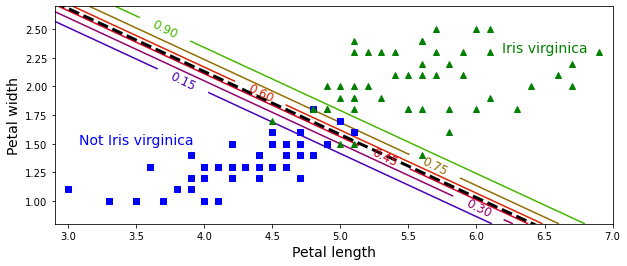

In [79]:
x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )

X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X_two_feat[y==0, 0], X_two_feat[y==0, 1], "bs")
plt.plot(X_two_feat[y==1, 0], X_two_feat[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

### Softmax Regression

Generalization of Logistic Regression but to multipel classes. Also called *Multinomial Logistic Regression*.

In [82]:
y_all = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", C=10, solver="lbfgs")
softmax_reg.fit(X_two_feat, y_all)

softmax_reg.predict_proba([[5, 2]]) # 5 cm petal length and 2 cm width

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

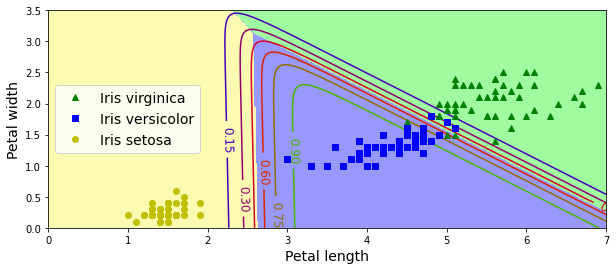

In [83]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X_two_feat[y_all==2, 0], X_two_feat[y_all==2, 1], "g^", label="Iris virginica")
plt.plot(X_two_feat[y_all==1, 0], X_two_feat[y_all==1, 1], "bs", label="Iris versicolor")
plt.plot(X_two_feat[y_all==0, 0], X_two_feat[y_all==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()